In [1]:
import yfinance as yf
import pandas as pd

In [2]:
nvda = yf.Ticker("NVDA")

In [3]:
nvda = nvda.history(period="max", interval="1wk")

In [4]:
nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-18 00:00:00-05:00,0.401407,0.447998,0.356010,0.376319,271468800,0.00,0.0
1999-01-25 00:00:00-05:00,0.406185,0.428884,0.363177,0.363177,156960000,0.00,0.0
1999-02-01 00:00:00-05:00,0.363177,0.382293,0.330922,0.378708,81268800,0.00,0.0
1999-02-08 00:00:00-05:00,0.381098,0.401407,0.341674,0.399018,63124800,0.00,0.0
1999-02-15 00:00:00-05:00,0.406185,0.422911,0.360788,0.399018,42480000,0.00,0.0
...,...,...,...,...,...,...,...
2023-05-15 00:00:00-04:00,285.050490,318.247067,281.490860,312.607666,239771500,0.00,0.0
2023-05-22 00:00:00-04:00,308.978024,394.759121,298.029145,389.419678,370798000,0.00,0.0
2023-05-29 00:00:00-04:00,405.908021,419.336624,378.180878,393.229309,304350900,0.00,0.0


In [5]:
nvda.index

DatetimeIndex(['1999-01-18 00:00:00-05:00', '1999-01-25 00:00:00-05:00',
               '1999-02-01 00:00:00-05:00', '1999-02-08 00:00:00-05:00',
               '1999-02-15 00:00:00-05:00', '1999-02-22 00:00:00-05:00',
               '1999-03-01 00:00:00-05:00', '1999-03-08 00:00:00-05:00',
               '1999-03-15 00:00:00-05:00', '1999-03-22 00:00:00-05:00',
               ...
               '2023-04-10 00:00:00-04:00', '2023-04-17 00:00:00-04:00',
               '2023-04-24 00:00:00-04:00', '2023-05-01 00:00:00-04:00',
               '2023-05-08 00:00:00-04:00', '2023-05-15 00:00:00-04:00',
               '2023-05-22 00:00:00-04:00', '2023-05-29 00:00:00-04:00',
               '2023-06-05 00:00:00-04:00', '2023-06-12 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1274, freq=None)

<Axes: xlabel='Date'>

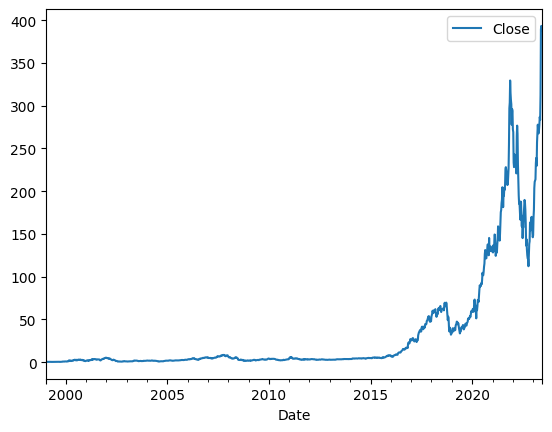

In [6]:
nvda.plot.line(y="Close", use_index=True)

In [7]:
del nvda["Dividends"]
del nvda["Stock Splits"]

In [8]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [9]:
nvda["NextYear"] = nvda["Close"].shift(-50)

In [10]:
nvda["Target"] = nvda["NextYear"]

In [11]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [12]:
predictors = ["Close", "Volume", "Open", "High", "Low"]

In [13]:
train = nvda.iloc[:-50]
test = nvda

In [14]:
reg.fit(train[predictors],train["Target"])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.03853e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.1)

In [15]:
predictions = reg.predict(test[predictors])

In [16]:
combined = pd.concat([test["Target"], pd.Series(predictions, index=test.index)], axis=1)

In [17]:
combined.columns = ["actual", "predictions"]

In [18]:
combined

,actual,predictions
Date,,
1999-01-18 00:00:00-05:00,0.800425,7.837587
1999-01-25 00:00:00-05:00,0.839849,9.672283
1999-02-01 00:00:00-05:00,0.855379,10.891456
1999-02-08 00:00:00-05:00,0.714409,11.191522
1999-02-15 00:00:00-05:00,0.775336,11.517041
...,...,...
2023-05-15 00:00:00-04:00,NaN,292.841372
2023-05-22 00:00:00-04:00,NaN,229.452979
2023-05-29 00:00:00-04:00,NaN,433.155541


<Axes: xlabel='Date'>

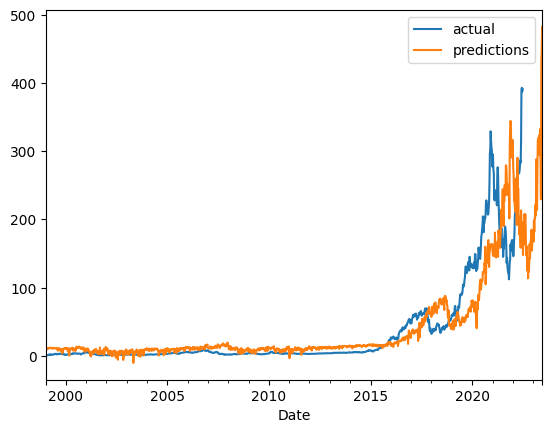

In [19]:
combined.plot()

In [20]:
myResults = combined.iloc[-60:]

<Axes: xlabel='Date'>

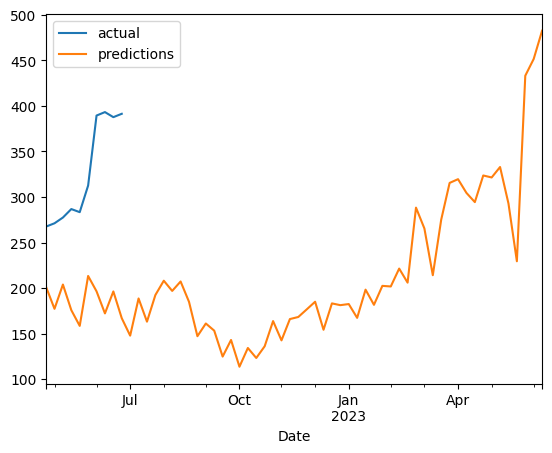

In [21]:
myResults.plot()

In [22]:
myResults

,actual,predictions
Date,,
2022-04-25 00:00:00-04:00,267.552307,201.153394
2022-05-02 00:00:00-04:00,271.161926,177.260938
2022-05-09 00:00:00-04:00,277.461273,203.905304
2022-05-16 00:00:00-04:00,286.770325,175.790200
2022-05-23 00:00:00-04:00,283.370667,158.521436
2022-05-30 00:00:00-04:00,312.607666,213.329158
2022-06-06 00:00:00-04:00,389.419678,196.463696
2022-06-13 00:00:00-04:00,393.229309,172.232225
2022-06-20 00:00:00-04:00,387.659882,196.335179


In [23]:
ourLow = myResults["predictions"].min()
ourLow

113.68745823345996

In [24]:
myResults.loc[myResults["predictions"]==ourLow]

,actual,predictions
Date,,
2022-10-03 00:00:00-04:00,NaN,113.687458


In [25]:
ourHigh = myResults["predictions"].max()
ourHigh

482.55850792440015

In [26]:
myResults.loc[myResults["predictions"]==ourHigh]

,actual,predictions
Date,,
2023-06-12 00:00:00-04:00,NaN,482.558508


In [27]:
lastMonth = myResults.iloc[-5:]

In [28]:
lastMonth

,actual,predictions
Date,,
2023-05-15 00:00:00-04:00,NaN,292.841372
2023-05-22 00:00:00-04:00,NaN,229.452979
2023-05-29 00:00:00-04:00,NaN,433.155541
2023-06-05 00:00:00-04:00,NaN,451.540266
2023-06-12 00:00:00-04:00,NaN,482.558508


In [29]:
lastMonth["predictions"]

Date
2023-05-15 00:00:00-04:00    292.841372
2023-05-22 00:00:00-04:00    229.452979
2023-05-29 00:00:00-04:00    433.155541
2023-06-05 00:00:00-04:00    451.540266
2023-06-12 00:00:00-04:00    482.558508
Name: predictions, dtype: float64

In [30]:
priceTarget = lastMonth["predictions"].mean()
priceTarget

377.9097332263129